In [1]:
#Modules Needed
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:

import sqlalchemy 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [5]:
#Create engine
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [6]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [7]:
#View automap results
Base.classes.keys()

['measurement', 'station']

In [8]:
#Save table locations
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
#Create Session
session = Session(engine)

# Exploratory Climate Analysis

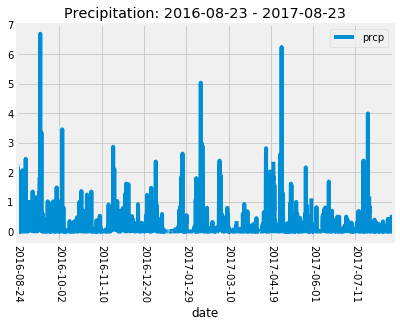

In [12]:
#Query for the last 12 months of precipitation data

#Get Latest Date in Table
startDate = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())
startDate = np.ravel(startDate)[0]
#Get 1 year before latest date
endDate = dt.datetime.strptime(startDate, '%Y-%m-%d') - dt.timedelta(days=1*365)
endDate = (endDate.strftime('%Y-%m-%d'))

#Query for precipitation, filtered by desired dates, and ordered from start to end
precipitation = (session.query(Measurement.date, Measurement.prcp)
                .filter(Measurement.date > endDate)
                .order_by(Measurement.date.asc())
                     .all())


# Save Querey as Df
prcpTable = pd.DataFrame(precipitation)
prcpTable = prcpTable.set_index('date')
# Sort by date
prcpTable = prcpTable.sort_index(ascending=True)
# Plot

title = f'Precipitation: {endDate} - {startDate}'

prcpTable.plot(title=title, rot=270)

In [13]:
#Query for total number of stations
numStations = session.query(Station).count()
print(f"Number of Stations: {numStations}")

Number of Stations: 9


In [17]:
#Query for most active stations
#Create Frequency column and order by it
stationFrequency = session.query(Measurement.station,
    func.count(Measurement.station).label('Frequency')
    ).group_by(Measurement.station
    ).order_by(desc('Frequency')).all()



newTable = pd.DataFrame(stationFrequency)
stationFrequency
mostFrequent = stationFrequency[0][0]
newTable

,station,Frequency
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


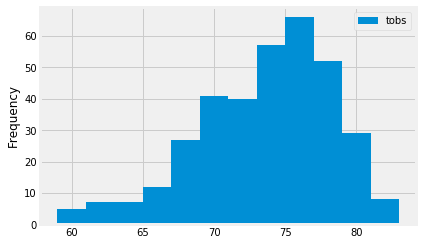

In [19]:
#Filter by most popular station
# Query for last 12 months of tobs data
startDate = (session.query(Measurement.date)
                 .order_by(Measurement.date.desc())
                 .first())

startDate = np.ravel(startDate)[0]
#Get 1 year before latest date
endDate = dt.datetime.strptime(startDate, '%Y-%m-%d') - dt.timedelta(days=1*365)
endDate = (endDate.strftime('%Y-%m-%d'))

# Perform a query to retrieve the data and precipitation scores
Temperature = (session.query(Measurement.station, Measurement.date, Measurement.tobs)
                .filter(Measurement.date > endDate)
                .filter(Measurement.station == mostFrequent)
                .order_by(Measurement.date.asc())
                     .all())
TempDf = pd.DataFrame(Temperature)
TempDf.plot.hist(bins = 12)